<a href="https://www.kaggle.com/code/stefanraychev/analysis-of-lifelong-learning?scriptVersionId=98494285" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Lifelong learning is an important element of the country's economic and social system. On the one hand, it increases the quality of the workforce by maintaining up-to-date knowledge and skills. On the other hand, knowledge is the main tool against the defects of the democratic and market system - corruption, populism, labor and market exploitation, market and non-market imperfections, etc. For this reason, the analysis and promotion of lifelong learning is of vital importance for any government policy.

In this analysis, we take a brief look at the process of lifelong learning in Europe. The analysis uses Eurostat's database and Eurostat's definition of lifelong learning: "Lifelong learning covers all lifelong learning activities aimed at improving knowledge, skills and competences in personal, civic, social or employment-related perspectives. The intention or goal of learning is the critical point that distinguishes these activities from non-learning activities, such as cultural or sports activities.

Participation in education and training is a measure of lifelong learning. The participation rate in education and training covers participation in formal and non-formal education and training. In this section the reference period for the participation in education and training is the four weeks prior to the interview. Participation rates in education and training for various age groups and by different breakdowns are presented.

The data shown are calculated as annual averages of quarterly EU Labour Force Survey data (EU-LFS)."

For more information about the data and methodology: https://ec.europa.eu/eurostat/cache/metadata/en/trng_lfs_4w0_esms.htm

In this first stape we make a short glance using the exploratory data analysis on the Participation in education and training (covers participation in formal and non-formal education and training.) over a 18 year period from 2004 to 2021 in sex, education level and age. The data includes EU member states and other Europe countries. 

Lets first install Eurostat Python Package

In [1]:
!pip install 'eurostat'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 578.0 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 2.1 MB/s eta 0:00:00
  Created wheel for jsonpath-rw: filename=jsonpath_rw-1.4.0-py3-none-any.whl size=15147 sha256=dadaf8525ad411947b6a308fccbe689a55765c5ebc4b59034b9d80f1d8b9fc54
  Stored in directory: /root/.cache/pip/wheels/58/88/2a/8d619cf38d7cf939e54b6ccdece05d31b64b3eb419c11d1ed3
Successfully built jsonpath-rw




The next step is the import of relevant libraries and tools to be used for analysis


In [2]:
import eurostat
import warnings
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pytz
import seaborn as sns
import scipy.stats as stats
import statsmodels as sm
import plotly.express as px
from pandas import DataFrame
import plotly.express as px
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
warnings.filterwarnings('ignore')

Lets import the data and take a look. 

In [3]:
df_lll = eurostat.get_data_df("trng_lfs_02")
df_lll.head(5)

,unit,isced11,sex,age,geo\time,2021,2020,2019,2018,2017,...,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004
0,PC,ED0-2,F,Y18-24,AT,63.0,63.0,61.5,64.6,63.8,...,69.8,68.3,66.9,67.0,64.9,62.5,59.5,58.8,60.7,59.3
1,PC,ED0-2,F,Y18-24,BE,73.0,71.7,72.1,72.2,64.5,...,55.6,53.8,53.8,55.8,54.6,52.0,52.6,53.2,49.2,62.5
2,PC,ED0-2,F,Y18-24,BG,50.4,54.9,50.8,48.6,48.1,...,49.0,47.5,52.4,51.6,50.5,50.6,54.2,47.7,42.1,45.1
3,PC,ED0-2,F,Y18-24,CH,77.4,85.2,83.5,86.1,83.6,...,80.8,81.3,81.9,77.0,74.2,77.4,80.0,75.7,73.2,74.6
4,PC,ED0-2,F,Y18-24,CY,33.3,23.7,31.1,44.3,40.2,...,51.9,45.0,37.9,31.2,28.9,25.0,41.7,26.3,20.7,28.6


Before next step, whenever we use imported data from Eurostat, it is good to rename the column "geo\time". This is necessary to avoid difficulty in the next use of the column names. I chooce to rename it with simple "geo".

In [4]:
df_lll.rename({"geo\\time":"geo"}, inplace=True, axis=1)
df_lll.head(5)

,unit,isced11,sex,age,geo,2021,2020,2019,2018,2017,...,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004
0,PC,ED0-2,F,Y18-24,AT,63.0,63.0,61.5,64.6,63.8,...,69.8,68.3,66.9,67.0,64.9,62.5,59.5,58.8,60.7,59.3
1,PC,ED0-2,F,Y18-24,BE,73.0,71.7,72.1,72.2,64.5,...,55.6,53.8,53.8,55.8,54.6,52.0,52.6,53.2,49.2,62.5
2,PC,ED0-2,F,Y18-24,BG,50.4,54.9,50.8,48.6,48.1,...,49.0,47.5,52.4,51.6,50.5,50.6,54.2,47.7,42.1,45.1
3,PC,ED0-2,F,Y18-24,CH,77.4,85.2,83.5,86.1,83.6,...,80.8,81.3,81.9,77.0,74.2,77.4,80.0,75.7,73.2,74.6
4,PC,ED0-2,F,Y18-24,CY,33.3,23.7,31.1,44.3,40.2,...,51.9,45.0,37.9,31.2,28.9,25.0,41.7,26.3,20.7,28.6


After importing the data, it is important to understand the parameters and dimensions of the data, including data size, columns, rows, etc.

In [5]:
df_lll.shape
df_lll.columns
df_lll.unit.unique()
df_lll.age.unique()
df_lll.sex.unique()
df_lll.isced11.unique()
df_lll.geo.unique()

(6563, 23)

Index([   'unit', 'isced11',     'sex',     'age',     'geo',      2021,
            2020,      2019,      2018,      2017,      2016,      2015,
            2014,      2013,      2012,      2011,      2010,      2009,
            2008,      2007,      2006,      2005,      2004],
      dtype='object')

array(['PC'], dtype=object)

array(['Y18-24', 'Y18-64', 'Y18-69', 'Y18-74', 'Y20-34', 'Y25-54',
       'Y25-64', 'Y25-69', 'Y25-74', 'Y55-74'], dtype=object)

array(['F', 'M', 'T'], dtype=object)

array(['ED0-2', 'ED3-8', 'ED3_4', 'ED5-8', 'NRP', 'TOTAL'], dtype=object)

array(['AT', 'BE', 'BG', 'CH', 'CY', 'CZ', 'DE', 'DK', 'EA19', 'EE', 'EL',
       'ES', 'EU15', 'EU27_2020', 'EU28', 'FI', 'FR', 'HR', 'HU', 'IE',
       'IS', 'IT', 'LT', 'LU', 'LV', 'ME', 'MK', 'MT', 'NL', 'NO', 'PL',
       'PT', 'RO', 'RS', 'SE', 'SI', 'SK', 'TR', 'UK'], dtype=object)

If we take a quick glance at the imported dataset we see that the size is 6563 rows/ 23 columns.
* Тhe units of measure is only Percentages (PC). 
* The age groups are 10 - different full age gropus and one for young (18-24).
* The sex can be Total , Male and Female. 
* Education levels are 4: ED0-2(Pre-primary, primary and lower secondary education (levels 0-2)), ED3-8 (Upper secondary, post-secondary non-tertiary and tertiary education (levels 3-8)), ED3_4 (Upper secondary and post-secondary non-tertiary education (levels 3 and 4)), ED5-8 (Tertiary education (levels 5-8)). Alse have Total and NRP (No response)


Now, for ease, let's rename the country codes into names, the education column (isced11) and drop some of the columns

In [6]:
df_lll["country"] = df_lll["geo"].replace(pytz.country_names)
df_lll["education"] = df_lll["isced11"]
df_lll.drop(["geo", "unit" , "isced11"], axis=1, inplace=True)
df_lll.head()

,sex,age,2021,2020,2019,2018,2017,2016,2015,2014,...,2011,2010,2009,2008,2007,2006,2005,2004,country,education
0,F,Y18-24,63.0,63.0,61.5,64.6,63.8,61.6,60.7,60.2,...,66.9,67.0,64.9,62.5,59.5,58.8,60.7,59.3,Austria,ED0-2
1,F,Y18-24,73.0,71.7,72.1,72.2,64.5,60.0,54.8,58.2,...,53.8,55.8,54.6,52.0,52.6,53.2,49.2,62.5,Belgium,ED0-2
2,F,Y18-24,50.4,54.9,50.8,48.6,48.1,45.3,46.1,48.8,...,52.4,51.6,50.5,50.6,54.2,47.7,42.1,45.1,Bulgaria,ED0-2
3,F,Y18-24,77.4,85.2,83.5,86.1,83.6,79.7,80.6,78.8,...,81.9,77.0,74.2,77.4,80.0,75.7,73.2,74.6,Switzerland,ED0-2
4,F,Y18-24,33.3,23.7,31.1,44.3,40.2,50.1,61.1,57.9,...,37.9,31.2,28.9,25.0,41.7,26.3,20.7,28.6,Cyprus,ED0-2


Almost nice view , now lets rearenge the columns for more logic

In [7]:
df_lll = df_lll[list(df_lll.columns[:2]) + list(df_lll.columns[:1:-1])]
df_lll.head()

,sex,age,education,country,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,F,Y18-24,ED0-2,Austria,59.3,60.7,58.8,59.5,62.5,64.9,...,68.3,69.8,60.2,60.7,61.6,63.8,64.6,61.5,63.0,63.0
1,F,Y18-24,ED0-2,Belgium,62.5,49.2,53.2,52.6,52.0,54.6,...,53.8,55.6,58.2,54.8,60.0,64.5,72.2,72.1,71.7,73.0
2,F,Y18-24,ED0-2,Bulgaria,45.1,42.1,47.7,54.2,50.6,50.5,...,47.5,49.0,48.8,46.1,45.3,48.1,48.6,50.8,54.9,50.4
3,F,Y18-24,ED0-2,Switzerland,74.6,73.2,75.7,80.0,77.4,74.2,...,81.3,80.8,78.8,80.6,79.7,83.6,86.1,83.5,85.2,77.4
4,F,Y18-24,ED0-2,Cyprus,28.6,20.7,26.3,41.7,25.0,28.9,...,45.0,51.9,57.9,61.1,50.1,40.2,44.3,31.1,23.7,33.3


A similar method of data manipulation will be used in the next steps of graphical visualization. First, the unnecessary data will be removed or the necessary data will be selected, and second, a table will be rearranged for a type suitable for visualization.

Lifelong learning in EU28 by education and sex

remove ED3-8, NRP from education and select only 18-74 years in age

In [8]:
df_EU28=df_lll[(df_lll['age']=="Y18-74") & (df_lll['country']=="EU28") & (df_lll['education'] != "NRP") & (df_lll['education'] != "ED3-8")]
df_EU28g=df_EU28.melt(id_vars=["country", "age", "sex" ,"education"], 
        var_name="Date", 
        value_name="Value")
df_EU28g.head()

,country,age,sex,education,Date,Value
0,EU28,Y18-74,F,ED0-2,2004,8.6
1,EU28,Y18-74,M,ED0-2,2004,9.4
2,EU28,Y18-74,T,ED0-2,2004,9.0
3,EU28,Y18-74,F,ED3_4,2004,17.6
4,EU28,Y18-74,M,ED3_4,2004,14.9


<Figure size 720x288 with 0 Axes>

Text(0.0, 1.0, 'EU28 - participation rate by sex and education level')

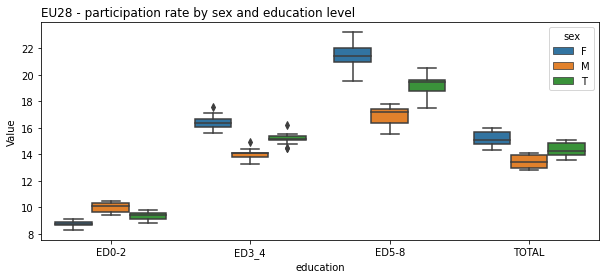

In [9]:
plt.figure(figsize=(10,4))
ax = sns.boxplot(x='education', y='Value', data=df_EU28g, hue="sex")
plt.title("EU28 - participation rate by sex and education level", loc="left")
plt.show()

From the EU28 graph above, we see the distribution of participation rate by gender and level of education. The highest level of participation is the level of education ED5-8 with average 20%, the level ED3-4 is with average 16% and the lowest level of education ED0-2 is with average 10% participation rate.

With the highest number of participation rate by sex are female for level of education ED5-8 and ED3-4,but for education level ED0-2 the male sex are with more  participation rate.

Looking the total education level we see that the average participation rate for EU 28 is around 14% and the female are with highest rate then male.

Now lets check the descriptive statistics to confirm the conclusions for EU28

First will rearrange the data by sex

In [10]:
df_EU28_sex = df_EU28.set_index(['sex', 'age', "education" , "country"]).rename_axis(['Year'], axis=1).stack().unstack("sex").reset_index()
df_EU28_sex.head()

sex,age,education,country,Year,F,M,T
0,Y18-74,ED0-2,EU28,2004,8.6,9.4,9.0
1,Y18-74,ED0-2,EU28,2005,8.3,9.5,8.8
2,Y18-74,ED0-2,EU28,2006,8.5,9.5,9.0
3,Y18-74,ED0-2,EU28,2007,8.6,9.5,9.0
4,Y18-74,ED0-2,EU28,2008,8.7,9.7,9.2


In [11]:
df_EU28_sex[['F', 'M', 'T']].describe()

sex,F,M,T
count,64.000000,64.000000,64.000000
mean,15.432813,13.603125,14.517187
std,4.546621,2.517492,3.550254
min,8.300000,9.400000,8.800000
25%,13.000000,12.225000,12.650000
50%,15.850000,13.900000,14.900000
75%,18.075000,15.050000,16.525000
max,23.200000,17.800000,20.500000


Second will rearrange the data by education level

In [12]:
df_EU28_edu = df_EU28.set_index(['sex', 'age', "education" , "country"]).rename_axis(['Year'], axis=1).stack().unstack("education").reset_index()
df_EU28_edu.head()

education,sex,age,country,Year,ED0-2,ED3_4,ED5-8,TOTAL
0,F,Y18-74,EU28,2004,8.6,17.6,23.2,15.1
1,F,Y18-74,EU28,2005,8.3,16.9,22.1,14.8
2,F,Y18-74,EU28,2006,8.5,17.1,22.0,15.0
3,F,Y18-74,EU28,2007,8.6,16.7,21.3,14.7
4,F,Y18-74,EU28,2008,8.7,16.7,21.2,14.9


In [13]:
df_EU28_edu[["ED0-2","ED3_4","ED5-8", "TOTAL"]].describe()

education,ED0-2,ED3_4,ED5-8,TOTAL
count,48.000000,48.000000,48.000000,48.000000
mean,9.395833,15.202083,19.127083,14.345833
std,0.599276,1.092234,2.014917,0.876395
min,8.300000,13.300000,15.500000,12.800000
25%,8.900000,14.175000,17.475000,13.800000
50%,9.400000,15.150000,19.450000,14.200000
75%,9.800000,16.125000,20.725000,14.900000
max,10.500000,17.600000,23.200000,16.000000


To summarize, the mean of participation rate in EU28 by sex is: female 15.43%, male 13.60%, total 14.51%; by education level is: ED0-2 9.4%, ED3_4 15.2%, ED5-8 19.12%, TOTAL 14.34%

Now lets take a view on participation level for all countries by sex

In [14]:
df_all=df_lll[(df_lll['age']=="Y18-74") & (df_lll['education']=="TOTAL")]
df_allg=df_all.melt(id_vars=["country", "age", "sex" ,"education"], 
        var_name="Date", 
        value_name="Value")
df_allg.head()

,country,age,sex,education,Date,Value
0,Austria,Y18-74,F,TOTAL,2004,16.4
1,Belgium,Y18-74,F,TOTAL,2004,14.1
2,Bulgaria,Y18-74,F,TOTAL,2004,6.3
3,Switzerland,Y18-74,F,TOTAL,2004,29.0
4,Cyprus,Y18-74,F,TOTAL,2004,12.4


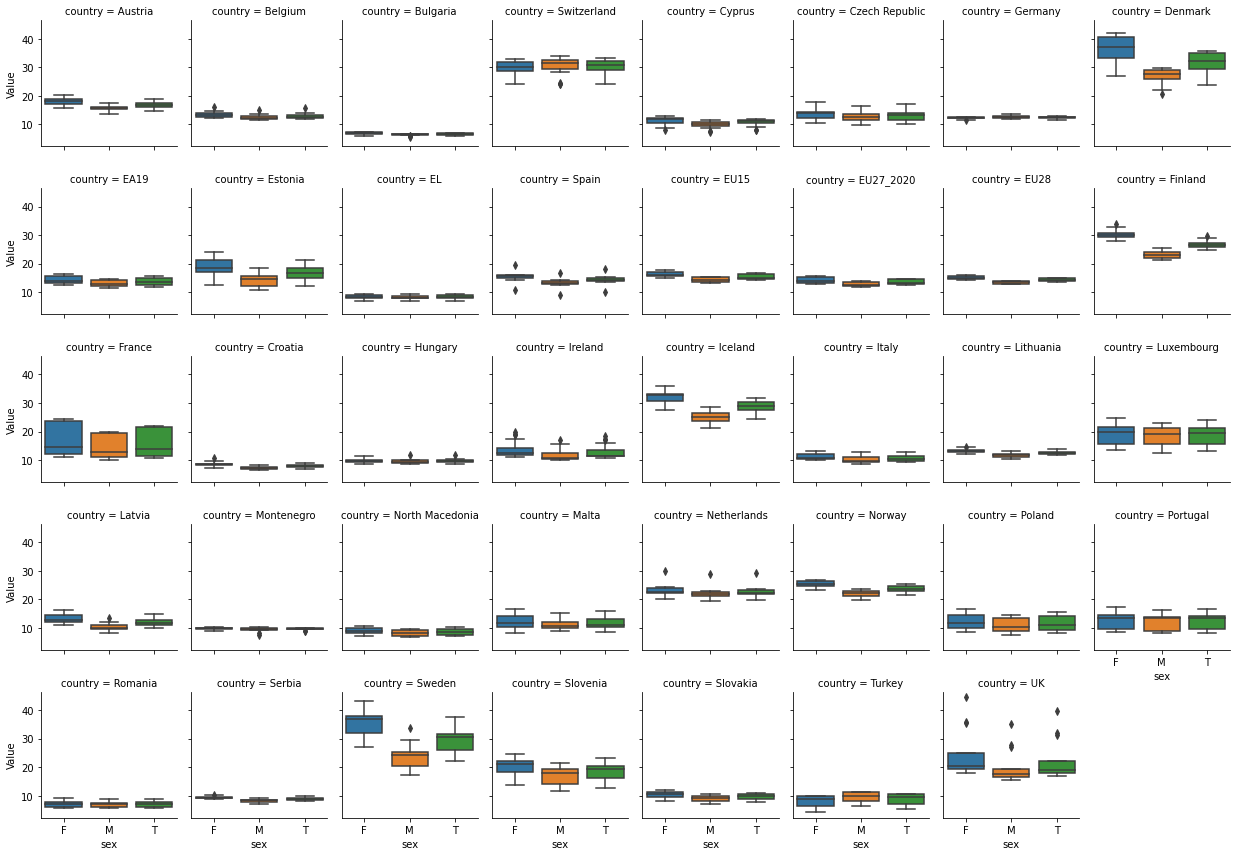

In [15]:
g_lll_all = sns.catplot(x="sex", y="Value", col="country", col_wrap=8, data=df_allg, kind="box", height=2.4, aspect=0.9);

We see that with highest participation rate by countries are Denmark, Switz, Finland, Iceland, Sweden. With lowest rate are Bulgaria, Croatia, Montenegro, Romania, Serbia Slovakia, Turkey.